In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy
from scipy import stats
import numpy as np
from matplotlib import font_manager, rc
from scipy.stats import chi2_contingency
from statannot import add_stat_annotation
from dash import Dash, html, dcc, Input, Output, dash_table
import plotly.express as px
import plotly.graph_objects as go

mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import numpy as np
from scipy import stats

import mapboxgl
import json
import os
import folium

## 데이터 전처리

## 분석

In [76]:
df = pd.read_excel('D:/백업용/일자별 정리/2307/230726까지_교육통계 대시보드 만들기/교육통계 프로젝트-20230726T095526Z-001/교육통계 프로젝트/최종 데이터셋/(전처리 data)교육통계데이터_2022_최종_교사수전체포함.xlsx')

In [77]:
df

,연도,시도,행정구역,학제,학교수,학생수_전체,학생수_남,학생수_여,교사수,입학자_전체,입학자_남,입학자_여,학업중단자_전체,학업중단자_남,학업중단자_여,교사수_전체
0,2022,서울,종로구,고등학교,14,7589,4080,3509,11,2505,1337,1168,158,78,80,666
1,2022,서울,종로구,일반고,7,3584,2039,1545,6,1141,631,510,63,26,37,327
2,2022,서울,종로구,특목고,3,1878,629,1249,1,645,212,433,34,10,24,172
3,2022,서울,종로구,특성화고,3,1298,583,715,3,461,236,225,44,25,19,124
4,2022,서울,중구,고등학교,11,5547,2963,2584,5,1770,916,854,150,96,54,498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,2022,제주,제주시,특목고,2,388,166,222,0,142,59,83,8,3,5,51
743,2022,제주,제주시,특성화고,4,2136,1031,1105,4,748,348,400,23,9,14,212
744,2022,제주,서귀포시,고등학교,10,4094,2265,1829,8,1442,784,658,58,31,27,397
745,2022,제주,서귀포시,일반고,8,3364,1774,1590,6,1176,614,562,35,16,19,310


In [78]:
# 학제 카테고리를 고등학교로만 분류한다
df_hs = df[df['학제'] == '고등학교']

# 상담교사수를 시도별로 그룹화한다
teacher_num = df_hs.groupby('시도')['교사수'].sum()

teacher_num = teacher_num.to_frame()

# 전체 교사수를 시도별로 그룹화한다
T_teacher_num = df_hs.groupby('시도')['교사수_전체'].sum()

T_teacher_num = T_teacher_num.to_frame()

# 학교수를 시도별로 그룹화한다
school_num = df_hs.groupby('시도')['학교수'].sum()

school_num = school_num.to_frame()

# 전체 학업중단자수를 시도별로 그룹화한다
q_student_num = df_hs.groupby('시도')['학업중단자_전체'].sum()

q_student_num = q_student_num.to_frame()

# 전체 학생수를 시도별로 그룹화한다
student_num = df_hs.groupby('시도')['학생수_전체'].sum()

student_num = student_num.to_frame()

# 하나의 데이터프레임으로 묶기 위해 병합하는 과정을 진행한다
df1 = pd.merge(teacher_num, school_num, on = '시도')

# 하나의 데이터프레임으로 묶기 위해 병합하는 과정을 진행한다
df2 = pd.merge(T_teacher_num, q_student_num, on = '시도')

df_num = pd.concat([df1, student_num, df2], axis = 1)
df_num = df_num.sort_values(by='교사수', ascending=False)
df_num

,교사수,학교수,학생수_전체,교사수_전체,학업중단자_전체
시도,,,,,
경기,243,486,340895,26222,5640
서울,169,320,207388,15731,3412
전남,72,144,44913,4496,738
부산,71,142,70161,5569,1056
경남,67,190,84613,6910,1104
경북,66,185,62986,5602,1060
인천,61,127,71760,6249,1093
충남,57,117,56081,4693,970
전북,52,133,48265,4403,765


In [79]:
# 상담교사 비율 컬럼을 새로 만들어 교사수 전체에서 상담교사가 차지하는 비율을 구함
df_num['상담교사 비율'] = round((df_num['교사수'] / df_num['교사수_전체'] * 100), 2)

# 학업중단자 비율 컬럼을 새로 만들어 전체 학생수에서 학업중단자가 차지하는 비율을 구함
df_num['학업중단자 비율'] = round((df_num['학업중단자_전체'] / df_num['학생수_전체'] * 100), 2)

df_num

,교사수,학교수,학생수_전체,교사수_전체,학업중단자_전체,상담교사 비율,학업중단자 비율
시도,,,,,,,
경기,243,486,340895,26222,5640,0.93,1.65
서울,169,320,207388,15731,3412,1.07,1.65
전남,72,144,44913,4496,738,1.60,1.64
부산,71,142,70161,5569,1056,1.27,1.51
경남,67,190,84613,6910,1104,0.97,1.30
경북,66,185,62986,5602,1060,1.18,1.68
인천,61,127,71760,6249,1093,0.98,1.52
충남,57,117,56081,4693,970,1.21,1.73
전북,52,133,48265,4403,765,1.18,1.58


### 학업중단자수와 교사수의 정규분포도

<Axes: xlabel='교사수', ylabel='Density'>

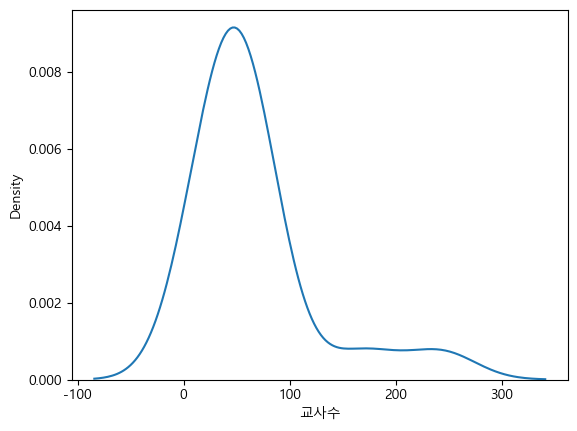

In [80]:
# 교사수 비율의 정규 분포도 -> 왼쪽으로 치우치는 경향이 있어서 log2 적용
sns.kdeplot(df_num['교사수'])

<Axes: xlabel='교사수_log2', ylabel='Density'>

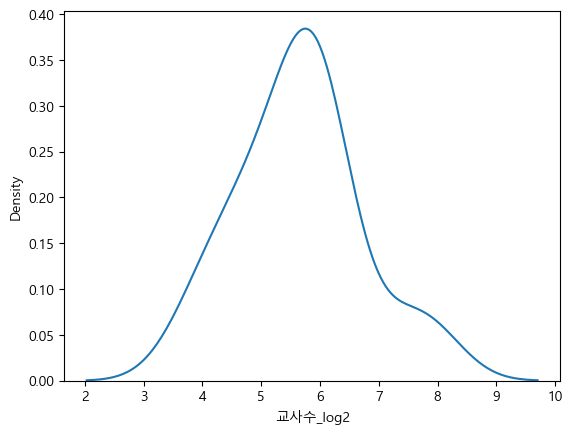

In [81]:
df_num['교사수_log2']  = np.log2(df_num['교사수']) 

sns.kdeplot(df_num['교사수_log2'])

<Axes: xlabel='학업중단자_전체', ylabel='Density'>

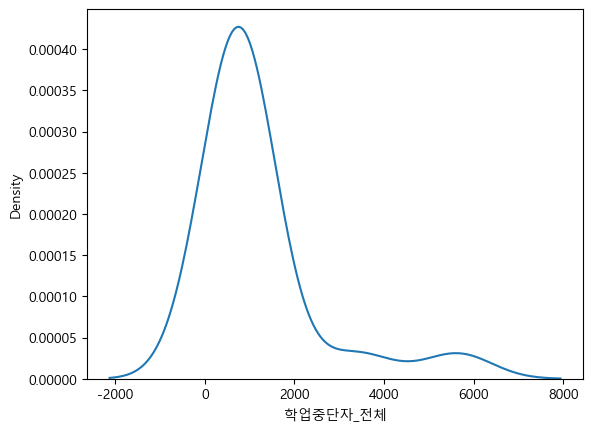

In [82]:
# 학업중단자 수의 정규분포도
sns.kdeplot(df_num['학업중단자_전체'])

<Axes: xlabel='학업중단자_전체_log2', ylabel='Density'>

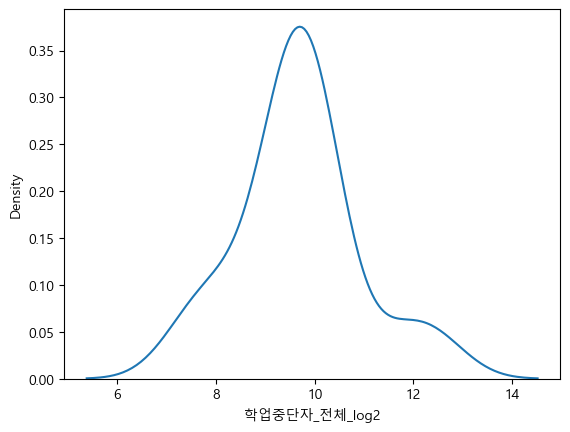

In [83]:
df_num['학업중단자_전체_log2']  = np.log2(df_num['학업중단자_전체']) 

sns.kdeplot(df_num['학업중단자_전체_log2'])

### 학업중단자 비율과 교사수 비율의 정규분포도

In [84]:
# 전문상담교사 배치율의 정규분포도

<Axes: xlabel='상담교사 비율_log2', ylabel='Density'>

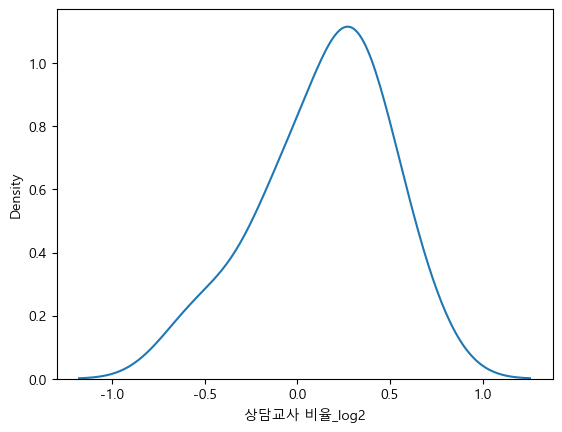

In [85]:
df_num['상담교사 비율_log2']  = np.log2(df_num['상담교사 비율']) 

sns.kdeplot(df_num['상담교사 비율_log2'])

In [86]:
# 학업중단자 비율의 정규분포도

<Axes: xlabel='학업중단자 비율_exp', ylabel='Density'>

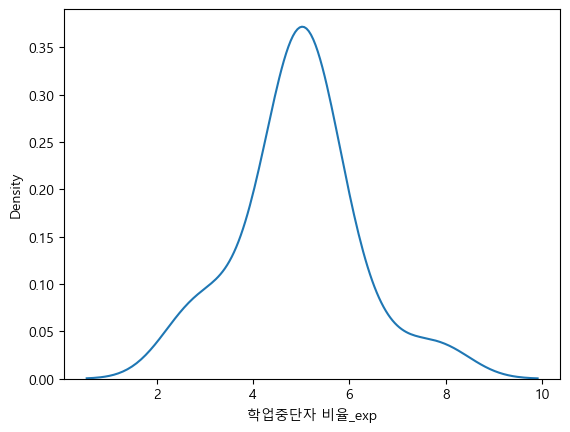

In [87]:
df_num['학업중단자 비율_exp']  = np.exp(df_num['학업중단자 비율']) 

sns.kdeplot(df_num['학업중단자 비율_exp'])

### 통계분석 결과

In [88]:
# 상담 교사수와 학업중단자수의 피어슨 분석 결과
# 피어슨 검정 왼쪽에 있는 값 = 피어슨 상관계수 양수면 상관관계 있음 음수면 없음
scipy.stats.pearsonr(df_num['학업중단자_전체'], df_num['교사수'])

PearsonRResult(statistic=0.980349465309231, pvalue=5.496966530837192e-12)

In [89]:
# 상담교사 비율과 학업중단자 비율의 피어슨 분석 결과
scipy.stats.pearsonr(df_num['상담교사 비율_log2'], df_num['학업중단자 비율_exp'])

PearsonRResult(statistic=0.3045738591648005, pvalue=0.23458147964199658)

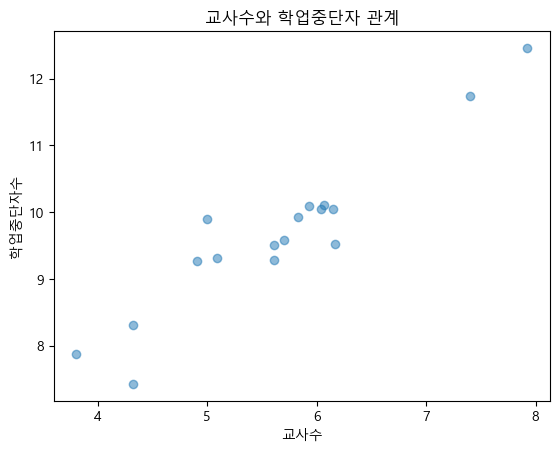

In [90]:
# 상담교사수와 학업중단자의 산점도 그래프
plt.scatter(df_num['교사수_log2'], df_num['학업중단자_전체_log2'], alpha=0.5)
plt.title('교사수와 학업중단자 관계')
plt.xlabel('교사수')
plt.ylabel('학업중단자수')
plt.show()

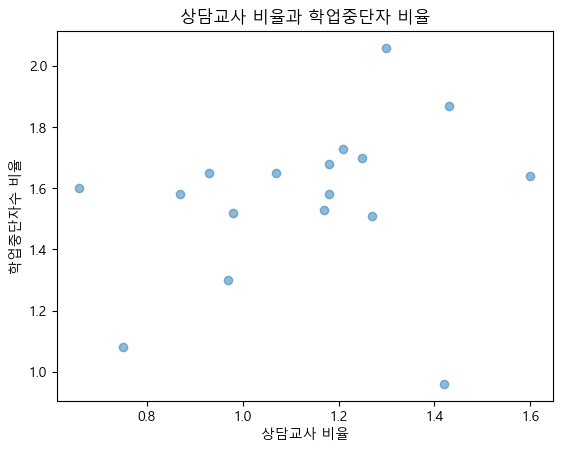

In [91]:
# 상담교사 비율과 학업중단자 비율의 산점도 그래프
plt.scatter(df_num['상담교사 비율'], df_num['학업중단자 비율'], alpha=0.5)
plt.title('상담교사 비율과 학업중단자 비율')
plt.xlabel('상담교사 비율')
plt.ylabel('학업중단자수 비율')
plt.show()

## 데이터 시각화

In [92]:
df

,연도,시도,행정구역,학제,학교수,학생수_전체,학생수_남,학생수_여,교사수,입학자_전체,입학자_남,입학자_여,학업중단자_전체,학업중단자_남,학업중단자_여,교사수_전체
0,2022,서울,종로구,고등학교,14,7589,4080,3509,11,2505,1337,1168,158,78,80,666
1,2022,서울,종로구,일반고,7,3584,2039,1545,6,1141,631,510,63,26,37,327
2,2022,서울,종로구,특목고,3,1878,629,1249,1,645,212,433,34,10,24,172
3,2022,서울,종로구,특성화고,3,1298,583,715,3,461,236,225,44,25,19,124
4,2022,서울,중구,고등학교,11,5547,2963,2584,5,1770,916,854,150,96,54,498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,2022,제주,제주시,특목고,2,388,166,222,0,142,59,83,8,3,5,51
743,2022,제주,제주시,특성화고,4,2136,1031,1105,4,748,348,400,23,9,14,212
744,2022,제주,서귀포시,고등학교,10,4094,2265,1829,8,1442,784,658,58,31,27,397
745,2022,제주,서귀포시,일반고,8,3364,1774,1590,6,1176,614,562,35,16,19,310


In [93]:
df['행정구역'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구', '동구',
       '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '연제구',
       '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '연수구', '미추홀구', '남동구',
       '부평구', '계양구', '강화군', '옹진군', '광산구', '유성구', '대덕구', '울주군', '세종시',
       '수원시', '성남시', '부천시', '안양시', '과천시', '안산시', '용인시', '군포시', '의왕시',
       '시흥시', '평택시', '화성시', '오산시', '광명시', '광주시', '하남시', '김포시', '이천시',
       '안성시', '여주시', '양평군', '고양시', '남양주시', '구리시', '의정부시', '파주시', '동두천시',
       '양주시', '포천시', '가평군', '연천군', '춘천시', '원주시', '강릉시', '동해시', '태백시',
       '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군', '화천군',
       '양구군', '인제군', '고성군', '양양군', '청주시', '충주시', '제천시', '보은군', '옥천군',
       '영동군', '진천군', '괴산군', '음성군', '단양군', '증평군', '천안시', '공주시', '보령시',
       '아산시', '서산시', '논산시', '계룡시', '금산군', '부여군', '서천군', '청양군', '홍성군',
       '예산군', '태

In [94]:
# 상담교사수 시각화
## 시도별 총 상담교사수 + 전국
## 학교당 상담교사수 

# 학제 중 고등학교만 추출하여 새로운 데이터 프레임 생성

df_hs = df[df['학제'] == '고등학교']

df_hs.reset_index(drop = True, inplace=True)

# 시도별 전문상담 교사수를 계산

df_hs.groupby('시도')['교사수'].sum()

시도
강원     49
경기    243
경남     67
경북     66
광주     34
대구     32
대전     30
부산     71
서울    169
세종     14
울산     20
인천     61
전남     72
전북     52
제주     20
충남     57
충북     49
Name: 교사수, dtype: int64

In [95]:
# 전문상담교사수, 학교수, 전체 학생수, 전체 교사수를 시도별로 모두 계산하여 하나의 데이터 프레임으로 만들어줌

teacher_num = df_hs.groupby('시도')['교사수'].sum()

teacher_num = teacher_num.to_frame()

school_num = df_hs.groupby('시도')['학교수'].sum()

school_num = school_num.to_frame()

student_num = df_hs.groupby('시도')['학생수_전체'].sum()

student_num = student_num.to_frame()

all_teacher_num = df_hs.groupby('시도')['교사수_전체'].sum()

all_teacher_num = all_teacher_num.to_frame()

df1 = pd.merge(teacher_num, school_num, on = '시도')

df2 = pd.merge(df1, student_num, on = '시도')

df_num = pd.merge(df2, all_teacher_num, on = '시도')

# 하나의 데이터프레임으로 만든 후, 전문상담교사수를 기준으로 내림차순하여 표로 시각화함 

df_num = df_num.sort_values(by='교사수', ascending=False)
df_num

,교사수,학교수,학생수_전체,교사수_전체
시도,,,,
경기,243,486,340895,26222
서울,169,320,207388,15731
전남,72,144,44913,4496
부산,71,142,70161,5569
경남,67,190,84613,6910
경북,66,185,62986,5602
인천,61,127,71760,6249
충남,57,117,56081,4693
전북,52,133,48265,4403


In [96]:
# 시도별 전문상담교사 수 - 파이차트로 표현

fig = px.pie(df_hs, values='교사수', names='시도')

fig.show()

In [97]:
# 시도별 상담교사 배치율
# 시도별로 1학교 당 상담교사 수가 1명 배치되었다면 100% 
# 상담교사수 / 전체학교수 * 100

df_num['전문상담교사_배치율'] = round((df_num['교사수'] / df_num['학교수'] * 100), 2)

df_num

,교사수,학교수,학생수_전체,교사수_전체,전문상담교사_배치율
시도,,,,,
경기,243,486,340895,26222,50.00
서울,169,320,207388,15731,52.81
전남,72,144,44913,4496,50.00
부산,71,142,70161,5569,50.00
경남,67,190,84613,6910,35.26
경북,66,185,62986,5602,35.68
인천,61,127,71760,6249,48.03
충남,57,117,56081,4693,48.72
전북,52,133,48265,4403,39.10


In [98]:
df_num['전문상담교사_비율'] = round((df_num['교사수'] / df_num['교사수_전체'] * 100), 2)

df_num['상담교사_1명당_학생수'] = round((df_num['학생수_전체'] / df_num['교사수'] * 100)).astype(int)

df_num['상담교사_1명당_학생수']

df_num

,교사수,학교수,학생수_전체,교사수_전체,전문상담교사_배치율,전문상담교사_비율,상담교사_1명당_학생수
시도,,,,,,,
경기,243,486,340895,26222,50.00,0.93,140286
서울,169,320,207388,15731,52.81,1.07,122715
전남,72,144,44913,4496,50.00,1.60,62379
부산,71,142,70161,5569,50.00,1.27,98818
경남,67,190,84613,6910,35.26,0.97,126288
경북,66,185,62986,5602,35.68,1.18,95433
인천,61,127,71760,6249,48.03,0.98,117639
충남,57,117,56081,4693,48.72,1.21,98388
전북,52,133,48265,4403,39.10,1.18,92817


In [99]:
print(df_num['상담교사_1명당_학생수'].min())
print(df_num['상담교사_1명당_학생수'].max())

62379
185541


In [100]:
# 미국상담협회에서는 상담교사 1명당 학생수를 250명으로 권장하고 있으나, 
# 국내 고등학교의 현실은 상담교사 1명당 엄청난 학생수를 담당하는 것으로 조사됨

In [101]:
# 전국 전문상담교사 비율 평균
tea_mean = round(df_num['전문상담교사_비율'].mean(), 2)
tea_mean

1.13

In [102]:
# 전문상담교사 비율 시각화

# 전문상담교사 비율이 높은 순서로 정렬함 (그래프를 이쁘게 보이기 위해)

df_num_sort1 = df_num.sort_values(by='전문상담교사_비율', ascending=False)
df_num_sort1

,교사수,학교수,학생수_전체,교사수_전체,전문상담교사_배치율,전문상담교사_비율,상담교사_1명당_학생수
시도,,,,,,,
전남,72,144,44913,4496,50.00,1.60,62379
충북,49,82,39112,3431,59.76,1.43,79820
제주,20,30,18093,1409,66.67,1.42,90465
세종,14,21,11484,1078,66.67,1.30,82029
부산,71,142,70161,5569,50.00,1.27,98818
강원,49,115,36821,3905,42.61,1.25,75145
충남,57,117,56081,4693,48.72,1.21,98388
전북,52,133,48265,4403,39.10,1.18,92817
경북,66,185,62986,5602,35.68,1.18,95433


In [103]:
# 데이터에 대한 이해가 더 빠를 수 있도록 컬럼 순서 변경

df_num_re = df_num[['학교수', '학생수_전체', '교사수', '교사수_전체', 
                 '전문상담교사_비율', '상담교사_1명당_학생수', '전문상담교사_배치율']]

In [104]:
# 테이블 칼럼의 글씨가 잘려 잘리지 않게 글씨크기를 줄여줌

df_num_rename = df_num_re.rename(columns = {'전문상담교사_비율':'상담교사_비율','상담교사_1명당_학생수':'교사_1명당_학생수','전문상담교사_배치율':'상담교사_배치율'})

fig =  ff.create_table(df_num_rename, index_title='시도별', index=True)
fig.show()

In [105]:
# 학교 수 시각화 (막대그래프)
# 그냥 마구보여주면 안이쁜거같아서 학교수 정렬 후 그래프 

In [106]:
df_num_sort2 = df_num.sort_values(by='학교수', ascending=False)

fig = px.bar(data_frame= df_num_sort2, x=df_num_sort2.index, y='학교수', text_auto=True)

fig.update_traces(textfont_size=12,
                  textangle=0, 
                  textposition="outside")

fig.show()

In [107]:
# 상담교사 수 시각화 (막대그래프)

df_num_sort3 = df_num.sort_values(by='교사수', ascending=False)

fig = px.bar(data_frame= df_num_sort3, x=df_num_sort3.index, y='교사수', text_auto=True)

fig.update_traces(textfont_size=12,
                  textangle=0, 
                  textposition="outside")

fig.show()

In [108]:
# 학교수와 교사수, 비율 동시에 보여주기

df_num_sort2

,교사수,학교수,학생수_전체,교사수_전체,전문상담교사_배치율,전문상담교사_비율,상담교사_1명당_학생수
시도,,,,,,,
경기,243,486,340895,26222,50.00,0.93,140286
서울,169,320,207388,15731,52.81,1.07,122715
경남,67,190,84613,6910,35.26,0.97,126288
경북,66,185,62986,5602,35.68,1.18,95433
전남,72,144,44913,4496,50.00,1.60,62379
부산,71,142,70161,5569,50.00,1.27,98818
전북,52,133,48265,4403,39.10,1.18,92817
인천,61,127,71760,6249,48.03,0.98,117639
충남,57,117,56081,4693,48.72,1.21,98388


In [109]:
go0 = []
go1 = []
go2 = []


# 인덱스
for i in range(len(df_num_sort2)):
    go0.append(df_num_sort2.index[i])

# 학교수
for i in range(len(df_num_sort2)):
    go1.append(df_num_sort2.iloc[i, 0])


# 상담 교사수    
for i in range(len(df_num_sort2)):
    go2.append(df_num_sort2.iloc[i, 2])

fig = go.Figure()

# 학교수
fig.add_trace(go.Bar(x = go0,
                    y = go1,
                    name = '학교수', ))

# 교사수
fig.add_trace(go.Bar(x = go0,
                    y = go2,
                    name = '상담교사수', ))

fig.show()

In [110]:
# 전문상담교사 비율 단위 차이가 너무 많이 나서 3개를 동시에 보여주는 것보다는 따로 보여주는게 더 좋다고 판단됨

df_num_sort1

,교사수,학교수,학생수_전체,교사수_전체,전문상담교사_배치율,전문상담교사_비율,상담교사_1명당_학생수
시도,,,,,,,
전남,72,144,44913,4496,50.00,1.60,62379
충북,49,82,39112,3431,59.76,1.43,79820
제주,20,30,18093,1409,66.67,1.42,90465
세종,14,21,11484,1078,66.67,1.30,82029
부산,71,142,70161,5569,50.00,1.27,98818
강원,49,115,36821,3905,42.61,1.25,75145
충남,57,117,56081,4693,48.72,1.21,98388
전북,52,133,48265,4403,39.10,1.18,92817
경북,66,185,62986,5602,35.68,1.18,95433


In [111]:
go00 = []
go3 = []

# 인덱스
for i in range(len(df_num_sort1)):
    go00.append(df_num_sort1.index[i])
    
# 비율    
for i in range(len(df_num_sort1)):
    go3.append(df_num_sort1.iloc[i, 5])

# 전문상담교사 비율
fig = go.Figure()

fig.add_trace(go.Bar(x = go00,
                    y = go3,
                    name = '전문상담교사_비율', ))
fig.show()

In [112]:
# 시도별 배치율 차이 시각화 (평균을 기준으로 그룹화하여)

# 전문상담교사 배치율이 높은 순서로 정렬함 (그래프를 이쁘게 보이기 위해)

df_num_sort11 = df_num.sort_values(by='전문상담교사_배치율', ascending=False)

tea_mean_ = round(df_num['전문상담교사_배치율'].mean(), 2)
tea_mean_

47.81

In [113]:
sort_colors_ = []

# 배치율이 평균보다 높으면 빨간색, 낮으면 파란색으로 표시

for i in range(len(df_num_sort11)):
    if df_num_sort11.iloc[i, 4] > tea_mean_:
        sort_colors_.append('red')
    else:
        sort_colors_.append('blue')

fig = px.bar(data_frame= df_num_sort11, x=df_num_sort11.index, y='전문상담교사_배치율', text_auto=True)

fig.update_traces(marker_color=sort_colors_, 
                  textfont_size=12,
                  textangle=0, 
                  textposition="outside")

fig.show()

In [114]:
# 시도별 비율 차이 시각화 (평균을 기준으로 그룹화하여)

sort_colors = []

# 비율이 평균보다 높으면 빨간색, 낮으면 파란색으로 표시

for i in range(len(df_num_sort1)):
    if df_num_sort1.iloc[i, 5] > tea_mean:
        sort_colors.append('red')
    else:
        sort_colors.append('blue')

fig = px.bar(data_frame= df_num_sort1, x=df_num_sort1.index, y='전문상담교사_비율', text_auto=True)

fig.update_traces(marker_color=sort_colors, 
                  textfont_size=12,
                  textangle=0, 
                  textposition="outside")

fig.show()

In [115]:
# 교사 1명당 학생 수

stud_mean = round(df_num['상담교사_1명당_학생수'].mean(), 2)
stud_mean

109922.59

In [116]:
df_num_sort4 = df_num.sort_values(by='상담교사_1명당_학생수', ascending=True)

sort_colors_2 = []

# 평균보다 높으면 빨간색, 낮으면 파란색으로 표시


for i in range(len(df_num_sort1)):
    if df_num_sort4.iloc[i, 5] > stud_mean:
        sort_colors_2.append('blue')
    else:
        sort_colors_2.append('red')

fig = px.bar(data_frame= df_num_sort4, x=df_num_sort4.index, y='상담교사_1명당_학생수', text_auto=True)

fig.update_traces(marker_color=sort_colors_2, 
                  textfont_size=12,
                  textangle=0, 
                  textposition="outside")

fig.show()

In [117]:
df_student = pd.concat(student, axis = 1)
# 시도별 학생수

df_student_sort1 = df_student.sort_values(by='학생수_전체', ascending=False)

fig = px.bar(data_frame= df_student_sort1, x=df_student_sort1.index, y='학생수_전체', text_auto=True)

fig.update_traces(textfont_size=12,
                  textangle=0, 
                  textposition="outside")

fig.show()

In [118]:
# 시도별 총 학업 중단자 수 

star = df_hs.groupby('시도')['학생수_전체'].sum()
star = star.to_frame()

star_m = df_hs.groupby('시도')['학생수_남'].sum()
star_m = star_m.to_frame()

star_f = df_hs.groupby('시도')['학생수_여'].sum()
star_f = star_f.to_frame()

s_drop = df_hs.groupby('시도')['학업중단자_전체'].sum()
s_drop = s_drop.to_frame()

s_drop_m = df_hs.groupby('시도')['학업중단자_남'].sum()
s_drop_m = s_drop_m.to_frame()

s_drop_f = df_hs.groupby('시도')['학업중단자_여'].sum()
s_drop_f = s_drop_f.to_frame()

student = [star, star_m, star_f, s_drop, s_drop_m, s_drop_f]

fig =  ff.create_table(df_student, index=True)
fig.show()

In [119]:
# 시도별 학업중단자 수

df_student_sort2 = df_student.sort_values(by='학업중단자_전체', ascending=False)

fig = px.bar(data_frame= df_student_sort2, x=df_student_sort2.index, y='학업중단자_전체', text_auto=True)

fig.update_traces(textfont_size=12,
                  textangle=0, 
                  textposition="outside")

fig.show()

In [120]:
# 전체 학생 중 학업중단자 비율 

df_student['학업중단자_비율'] = df_student['학업중단자_전체'] / df_student['학생수_전체'] * 100

df_student['학업중단자_비율'] = round(df_student['학업중단자_비율'], 2)

df_student_sort3 = df_student.sort_values(by='학업중단자_비율', ascending=False)

fig = px.bar(data_frame= df_student_sort3, x=df_student_sort3.index, y='학업중단자_비율', text_auto=True)

fig.update_traces(textfont_size=12,
                  textangle=0, 
                  textposition="outside")

fig.show()

In [121]:
s_go0 = []
s_go2 = []
s_go3 = []

for i in range(len(df_student_sort1)):
    s_go0.append(df_student_sort1.index[i])
    
for i in range(len(df_student_sort1)):
    s_go2.append(df_student_sort1.iloc[i, 3])
    
for i in range(len(df_student_sort1)):
    s_go3.append(df_student_sort1.iloc[i, 4])
    
# 시도별 학업중단자수와 비율 시각화

fig = go.Figure()

# 학업중단자수
fig.add_trace(go.Bar(x = s_go0,
                    y = s_go2,
                    name = '학업중단자수', ))

# 전체 학생 중 학업중단자 비율 
fig.add_trace(go.Bar(x = s_go0,
                    y = s_go3,
                    name = '전체 학생 중 학업중단자 비율 ', ))

fig.show()

In [122]:
#시도별 교사 1명당 상담학생수와 학업중단자

# 학생 1명당 배정되는 상담 교사수 
s_t = round((df_num['교사수'] / df_num['학생수_전체'] * 100), 2).to_frame()

t0 = df_student['학업중단자_비율'].to_frame()

t = pd.merge(s_t, t0, on = '시도')

t_go0 = []
t_go1 = []
t_go2 = []

for i in range(len(df_student_sort1)):
    t_go0.append(t.index[i])

for i in range(len(t)):
    t_go1.append(t.iloc[i, 0])
    
for i in range(len(t)):
    t_go2.append(t.iloc[i, 1])

# 시도별 학업중단자수와 비율 시각화
fig = make_subplots(rows= 2, cols= 1,
                   subplot_titles=('학생 1명당 배정되는 상담 교사 비율', '전체 학생 중 학업중단자 비율'))

# 전체 학생 중 학업중단자 비율 
fig.add_trace(
    go.Bar(x = t_go0, y = t_go2, name = '전체 학생 중 학업중단자 비율',),
           row = 2, col = 1)

# 학생 1명당 배정되는 상담 교사 비율
fig.add_trace(
    go.Bar(x = t_go0, y = t_go1, name = '학생 1명당 배정되는 상담 교사 비율',),
           row = 1, col = 1)

fig.show()

In [123]:
# 막대그래프만으론 관련이 있는지 확인하기 어려워 산점도를 그려보기로 함
# 정확한 관계를 알기 위해 시도별이 아닌 행정구역별로 분석하기로 함 
df_hs

,연도,시도,행정구역,학제,학교수,학생수_전체,학생수_남,학생수_여,교사수,입학자_전체,입학자_남,입학자_여,학업중단자_전체,학업중단자_남,학업중단자_여,교사수_전체
0,2022,서울,종로구,고등학교,14,7589,4080,3509,11,2505,1337,1168,158,78,80,666
1,2022,서울,중구,고등학교,11,5547,2963,2584,5,1770,916,854,150,96,54,498
2,2022,서울,용산구,고등학교,10,4575,3028,1547,7,1478,980,498,98,63,35,482
3,2022,서울,성동구,고등학교,8,3814,1294,2520,7,1251,402,849,81,41,40,397
4,2022,서울,광진구,고등학교,9,7222,2934,4288,4,2485,983,1502,93,31,62,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2022,경남,함양군,고등학교,4,744,391,353,1,261,132,129,12,5,7,98
225,2022,경남,거창군,고등학교,7,2026,1172,854,3,657,368,289,28,20,8,167
226,2022,경남,합천군,고등학교,6,602,329,273,1,180,100,80,12,7,5,102
227,2022,제주,제주시,고등학교,20,13999,7267,6732,12,4802,2463,2339,115,48,67,1012


<Axes: xlabel='학생1명당_상담교사_비율', ylabel='학업중단자_비율'>

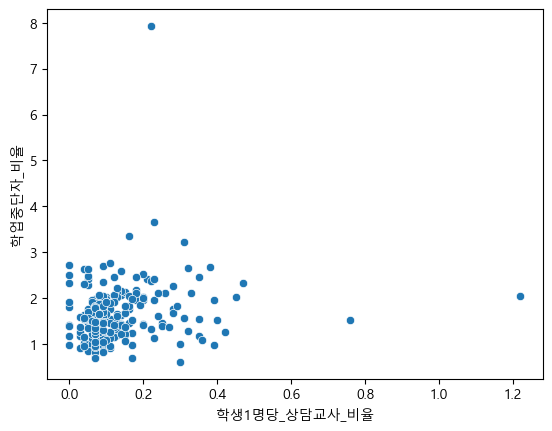

In [124]:
df_hs['학생1명당_상담교사_비율'] = round((df_hs['교사수'] / df_hs['학생수_전체'] * 100), 2)

df_hs['학업중단자_비율'] = round((df_hs['학업중단자_전체'] / df_hs['학생수_전체'] * 100), 2)

sns.scatterplot(x = df_hs['학생1명당_상담교사_비율'], y = df_hs['학업중단자_비율'])

<Axes: xlabel='학생1명당_상담교사_비율', ylabel='학업중단자_비율'>

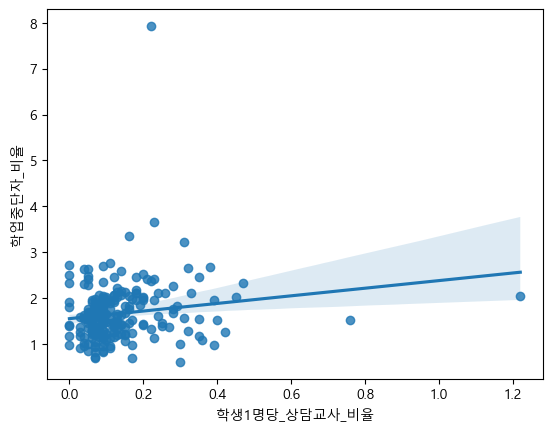

In [125]:
sns.regplot(x = df_hs['학생1명당_상담교사_비율'], y = df_hs['학업중단자_비율'])

In [126]:
# 이상치 제거 

# Q1 - 1.5 * IQR 보다 작거나 Q3 + 1.5 * IQR 보다 크면 이상치로 간주한다

out_index = []

In [127]:
# 학업중단자_비율 이상치

stop_q1 = df_hs['학업중단자_비율'].quantile(0.25)
stop_q3 = df_hs['학업중단자_비율'].quantile(0.75)

stop_IQR = stop_q3 - stop_q1

stop_out_min = stop_q1 - 1.5 * stop_IQR
stop_out_max = stop_q3 + 1.5 * stop_IQR

# 학생1명당_상담교사_비율 이상치

tech_q1 = df_hs['학생1명당_상담교사_비율'].quantile(0.25)
tech_q3 = df_hs['학생1명당_상담교사_비율'].quantile(0.75)

tech_IQR = tech_q3 - tech_q1

tech_out_min = tech_q1 - 1.5 * tech_IQR
tech_out_max = tech_q3 + 1.5 * tech_IQR

In [128]:
for i in df_hs[df_hs['학업중단자_비율'] < stop_out_min].index:
    out_index.append(i)

In [129]:
for i in df_hs[df_hs['학업중단자_비율'] > stop_out_max].index:
    out_index.append(i)

In [130]:
for i in df_hs[df_hs['학생1명당_상담교사_비율'] < tech_out_min].index:
    out_index.append(i)

In [131]:
for i in df_hs[df_hs['학생1명당_상담교사_비율'] > tech_out_max].index:
    out_index.append(i)

In [132]:
# df_hs.drop(out_index, inplace=True)

In [133]:
df_hs.reset_index(drop = True, inplace=True)

<Axes: xlabel='학생1명당_상담교사_비율', ylabel='학업중단자_비율'>

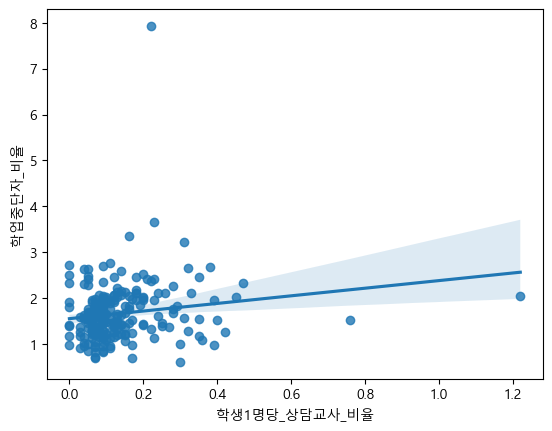

In [134]:
sns.regplot(x = df_hs['학생1명당_상담교사_비율'], y = df_hs['학업중단자_비율'])

In [135]:
df_hs.reset_index(drop = True, inplace=True)

<Axes: xlabel='학업중단자_비율', ylabel='Density'>

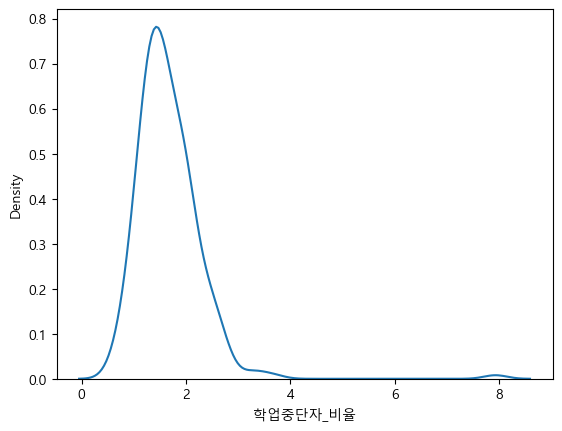

In [136]:
sns.kdeplot(df_hs['학업중단자_비율'])

<Axes: xlabel='학생1명당_상담교사_비율', ylabel='Density'>

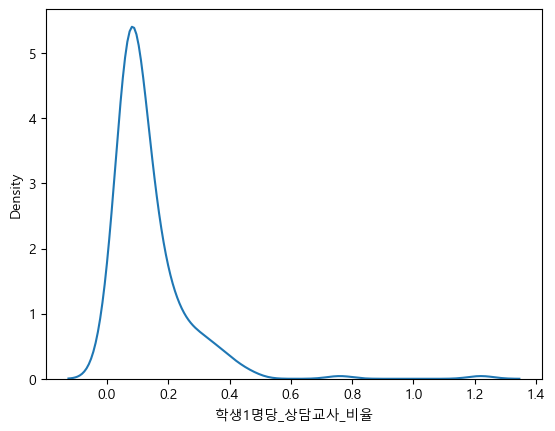

In [137]:
sns.kdeplot(df_hs['학생1명당_상담교사_비율'])

In [138]:
# 학업 중단자수 (남,녀)

m = df_hs['학업중단자_남'].sum()

f = df_hs['학업중단자_여'].sum()

total = df_hs['학업중단자_남'].sum() + df_hs['학업중단자_여'].sum()

data = dict(
    character=["성별", "남자", "여자"],
    parent=["", "성별", "성별"],
    value=[total, m, f])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)

fig.show()

In [139]:
# 학생 1명당 상담교사 비율 전국 시각화

df_hs['시도_new'] = df_hs['시도'].replace(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'],
                 ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시','경기도',
                 '강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도'])

df_teacher = df_hs.groupby('시도_new')['학생1명당_상담교사_비율'].mean().sort_values(ascending=True)

df_teacher

시도_new
대구광역시      0.056250
대전광역시      0.070000
울산광역시      0.070000
광주광역시      0.078000
경기도        0.078710
서울특별시      0.086800
경상남도       0.093889
부산광역시      0.110000
세종특별자치시    0.120000
충청남도       0.128667
경상북도       0.130000
제주특별자치도    0.145000
충청북도       0.190000
인천광역시      0.207000
전라남도       0.207273
전라북도       0.213571
강원도        0.220000
Name: 학생1명당_상담교사_비율, dtype: float64

In [140]:
# seoul_state_geo = 'TL_SCCO_CTPRVN.json' 
# geo_data = json.load(open(seoul_state_geo, encoding='utf-8'))

In [141]:
"""
map = folium.Map(location=[36.34, 127.77], zoom_start=7)
# location 지도 기준점 
# zoom 확대/축소
# 전국지도에 한번에 보여지기를 원해 대한민국 정가운데 지점으로 설정

folium.Choropleth(geo_data=geo_data, 
                  data=df_teacher,
                 colums=[df_teacher.index, df_teacher],
                 fill_color='PuRd',
                  key_on='properties.CTP_KOR_NM').add_to(map)
map
"""

"\nmap = folium.Map(location=[36.34, 127.77], zoom_start=7)\n# location 지도 기준점 \n# zoom 확대/축소\n# 전국지도에 한번에 보여지기를 원해 대한민국 정가운데 지점으로 설정\n\nfolium.Choropleth(geo_data=geo_data, \n                  data=df_teacher,\n                 colums=[df_teacher.index, df_teacher],\n                 fill_color='PuRd',\n                  key_on='properties.CTP_KOR_NM').add_to(map)\nmap\n"

In [142]:
df3 = pd.read_excel("D:/백업용/일자별 정리/2307/230726까지_교육통계 대시보드 만들기/교육통계 프로젝트-20230726T095526Z-001/교육통계 프로젝트/최종 데이터셋/(전처리 data)교육통계데이터_2015_2022_최종.xlsx")

In [143]:
df3

,연도,시도,행정구역,학제,학교수,학생수_계,교원수_정규_계,교원수_정규_상담_계,학업중단자_계,학업중단자_비율,교사수_비율
0,2015,서울,종로구,고등학교,15,12653,840,8,179,1.414684,0.952381
1,2015,서울,중구,고등학교,12,8933,637,5,97,1.085861,0.784929
2,2015,서울,용산구,고등학교,10,7580,538,6,100,1.319261,1.115242
3,2015,서울,성동구,고등학교,7,6428,467,3,118,1.835719,0.642398
4,2015,서울,광진구,고등학교,9,10936,586,2,168,1.536211,0.341297
...,...,...,...,...,...,...,...,...,...,...,...
1471,2020,경남,합천군,고등학교,6,713,109,1,22,3.085554,0.917431
1472,2020,경남,소계,고등학교,190,89026,7296,71,1301,1.461371,0.973136
1473,2020,제주,제주시,고등학교,20,14495,976,12,171,1.179717,1.229508
1474,2020,제주,서귀포시,고등학교,10,4184,383,5,66,1.577438,1.305483


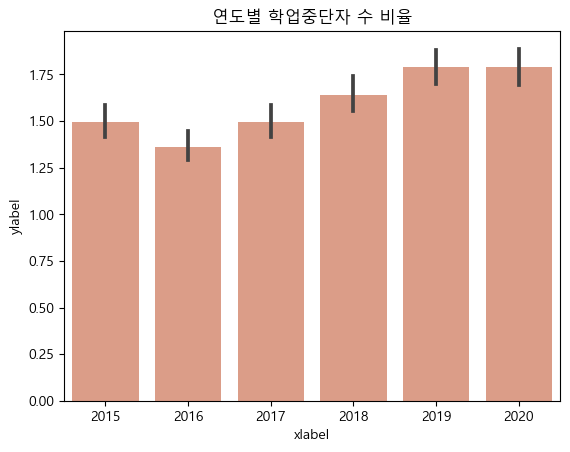

In [144]:
# 연도별 학업중단자 수 알아보기
sns.barplot(data=df3, x='연도', y='학업중단자_비율', color='#E9967A')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('연도별 학업중단자 수 비율')
plt.show()

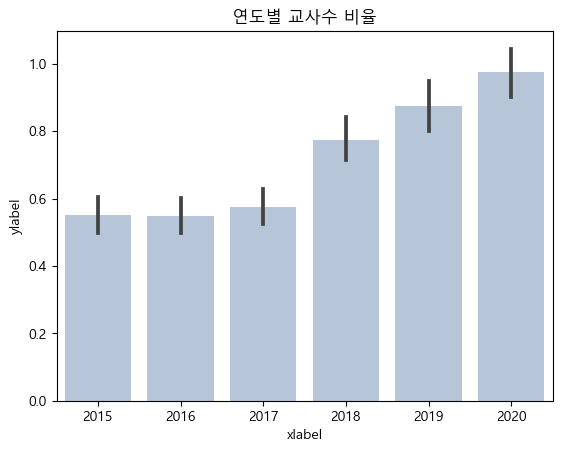

In [145]:
# 연도별 교사수 알아보기
sns.barplot(data=df3, x='연도', y='교사수_비율', color='#B0C4DE')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('연도별 교사수 비율')
plt.show()

In [146]:
#  포식자 피식자 그래프 해석: 가설의 인과관계가 뒤바뀌었음을 알 수 있음.
# 즉, 학업중단자의 비율이 많을 수록 상담 교사수의 비율도 늘어난다;

<Axes: xlabel='연도', ylabel='학업중단자_비율'>

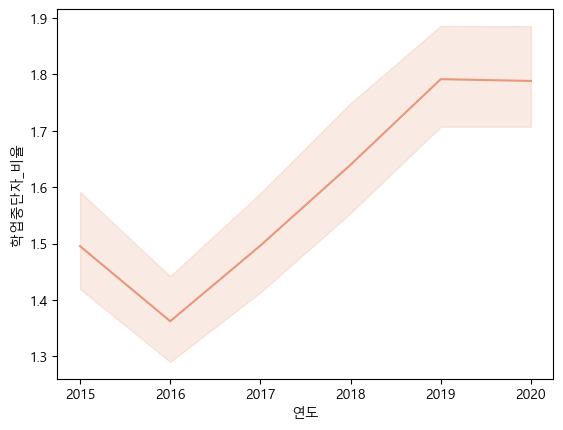

In [147]:
sns.lineplot(data=df3, x='연도', y='학업중단자_비율',color='#E9967A')

<Axes: xlabel='연도', ylabel='교사수_비율'>

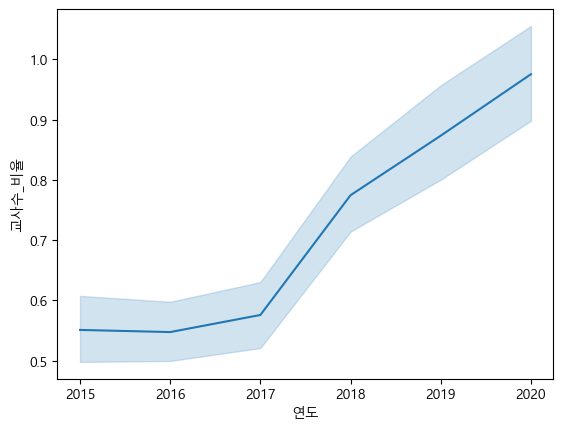

In [148]:
sns.lineplot(data=df3, x='연도', y='교사수_비율')

## 대시보드

In [149]:
df3['학업중단자_비율'] = round(df3['학업중단자_비율'], 2)

In [150]:
df3['교사수_비율'] = round(df3['교사수_비율'], 2)

In [151]:
# 데이터프레임 확인 

df3

,연도,시도,행정구역,학제,학교수,학생수_계,교원수_정규_계,교원수_정규_상담_계,학업중단자_계,학업중단자_비율,교사수_비율
0,2015,서울,종로구,고등학교,15,12653,840,8,179,1.41,0.95
1,2015,서울,중구,고등학교,12,8933,637,5,97,1.09,0.78
2,2015,서울,용산구,고등학교,10,7580,538,6,100,1.32,1.12
3,2015,서울,성동구,고등학교,7,6428,467,3,118,1.84,0.64
4,2015,서울,광진구,고등학교,9,10936,586,2,168,1.54,0.34
...,...,...,...,...,...,...,...,...,...,...,...
1471,2020,경남,합천군,고등학교,6,713,109,1,22,3.09,0.92
1472,2020,경남,소계,고등학교,190,89026,7296,71,1301,1.46,0.97
1473,2020,제주,제주시,고등학교,20,14495,976,12,171,1.18,1.23
1474,2020,제주,서귀포시,고등학교,10,4184,383,5,66,1.58,1.31


In [152]:
# 시와 연도별로 학업중단자와 교사수의 비율 평균을 계산함 

In [153]:
df4 = df3.groupby(['시도', '연도'])['학업중단자_비율'].mean()
df4

시도  연도  
강원  2015    1.405789
    2016    1.456316
    2017    1.458947
    2018    1.657895
    2019    1.772105
              ...   
충북  2016    1.814167
    2017    2.088333
    2018    2.123333
    2019    2.545833
    2020    2.204167
Name: 학업중단자_비율, Length: 102, dtype: float64

In [154]:
df5 = df3.groupby(['시도', '연도'])['교사수_비율'].mean()
df5

시도  연도  
강원  2015    0.372105
    2016    0.433684
    2017    0.482632
    2018    0.858421
    2019    1.016842
              ...   
충북  2016    0.971667
    2017    0.957500
    2018    1.096667
    2019    1.173333
    2020    1.270000
Name: 교사수_비율, Length: 102, dtype: float64

In [155]:
# 두 데이터프레임을 옆으로 합침

In [156]:
df6 = pd.concat([df4, df5], axis=1)

In [157]:
df6 = df6.reset_index() # 인덱스를 재설정하여 시도와 연도를 인덱스에서 빼냄

In [158]:
df6

,시도,연도,학업중단자_비율,교사수_비율
0,강원,2015,1.405789,0.372105
1,강원,2016,1.456316,0.433684
2,강원,2017,1.458947,0.482632
3,강원,2018,1.657895,0.858421
4,강원,2019,1.772105,1.016842
...,...,...,...,...
97,충북,2016,1.814167,0.971667
98,충북,2017,2.088333,0.957500
99,충북,2018,2.123333,1.096667
100,충북,2019,2.545833,1.173333


In [159]:
# 위의 데이터프레임을 복사하여 각각 기준란에 학업중단자의 비율인지 교사수의 비율인지를 표시함 

In [160]:
df7 = df6.copy()

In [161]:
for i in range(len(df7)):
    df7.loc[i,'비율값'] = df7.loc[i, '학업중단자_비율']
    df7.loc[i,'기준'] = "학업중단자"

In [162]:
for i in range(len(df6)):
    df6.loc[i,'비율값'] = df6.loc[i, '교사수_비율']
    df6.loc[i,'기준'] = "교사수"

In [163]:
df7

,시도,연도,학업중단자_비율,교사수_비율,비율값,기준
0,강원,2015,1.405789,0.372105,1.405789,학업중단자
1,강원,2016,1.456316,0.433684,1.456316,학업중단자
2,강원,2017,1.458947,0.482632,1.458947,학업중단자
3,강원,2018,1.657895,0.858421,1.657895,학업중단자
4,강원,2019,1.772105,1.016842,1.772105,학업중단자
...,...,...,...,...,...,...
97,충북,2016,1.814167,0.971667,1.814167,학업중단자
98,충북,2017,2.088333,0.957500,2.088333,학업중단자
99,충북,2018,2.123333,1.096667,2.123333,학업중단자
100,충북,2019,2.545833,1.173333,2.545833,학업중단자


In [164]:
df6

,시도,연도,학업중단자_비율,교사수_비율,비율값,기준
0,강원,2015,1.405789,0.372105,0.372105,교사수
1,강원,2016,1.456316,0.433684,0.433684,교사수
2,강원,2017,1.458947,0.482632,0.482632,교사수
3,강원,2018,1.657895,0.858421,0.858421,교사수
4,강원,2019,1.772105,1.016842,1.016842,교사수
...,...,...,...,...,...,...
97,충북,2016,1.814167,0.971667,0.971667,교사수
98,충북,2017,2.088333,0.957500,0.957500,교사수
99,충북,2018,2.123333,1.096667,1.096667,교사수
100,충북,2019,2.545833,1.173333,1.173333,교사수


In [165]:
# 학업중단자 비율과 교사수 비율 column을 없애고 비율값과 기준만 남겨둠 

In [166]:
df6 = df6.drop(['학업중단자_비율', '교사수_비율'], axis=1)

In [167]:
df7 = df7.drop(['학업중단자_비율', '교사수_비율'], axis=1)

In [168]:
df_graph = pd.concat([df6, df7])
df_graph

,시도,연도,비율값,기준
0,강원,2015,0.372105,교사수
1,강원,2016,0.433684,교사수
2,강원,2017,0.482632,교사수
3,강원,2018,0.858421,교사수
4,강원,2019,1.016842,교사수
...,...,...,...,...
97,충북,2016,1.814167,학업중단자
98,충북,2017,2.088333,학업중단자
99,충북,2018,2.123333,학업중단자
100,충북,2019,2.545833,학업중단자


In [169]:
# 대시보드에서 보여줄 테이블을 정리함 
# 테이블은 연도, 시도, 행정구역, 학업중단자 비율과 교사수 비율만 보여줌 

In [170]:
df_table = df3[['연도', '시도', '행정구역', '학업중단자_비율', '교사수_비율']]

In [171]:
app = Dash(__name__)

app.layout = html.Div([
    # 제목 
    html.H2(children='전문상담 교사 유무와 학업 중단자의 연관성 분석', style={'textAlign': 'center'}),
    
    # 그래프는 시도를 기준으로 Dropdown하여 보여줌
    # 서울을 먼저 보여줌
    dcc.Dropdown(df_graph['시도'].unique(), '서울', id='dropdown-selection'),
    
    # 전문상담 교사 비율과 학업 중단자의 비율을 paired plot으로 표현 
    html.H3(children='<연도별 전문상담교사와 학업중단자 비율 비교>', style={'textAlign': 'center'}),
    dcc.Graph(figure={}, id='graph-content1'),
    
    # 전문상담 교사 비율과 학업 중단자의 연도별 추세 표현 
    html.H3(children='<연도별 전문상담교사와 학업중단자 추세 비교>', style={'textAlign': 'center'}),
    dcc.Graph(figure={}, id='graph-content2'),
    
    # 테이블은 시도별 업데이트를 하지않고 한번에 전체 시도의 테이블을 출력
    dash_table.DataTable(data=df_table.to_dict('records'), page_size=10) 
])


@app.callback(
    Output("graph-content1", "figure"), 
    Input("dropdown-selection", "value"))

def update_bar_chart(value):
    dff = df_graph[df_graph['시도']==value]
    return px.bar(dff, x="연도", y="비율값", color="기준", barmode="group",
                 labels=dict(비율값="연도별 전문상담교사와 학업중단자 비율"))

@app.callback(
    Output("graph-content2", "figure"), 
    Input("dropdown-selection", "value"))

def update_graph(value):
    dff = df_graph[df_graph['시도']==value]
    return px.line(dff, x="연도", y="비율값",color='기준', symbol='기준',
                  labels=dict(비율값="연도별 전문상담교사와 학업중단자 비율")) 

if __name__ == "__main__":
    app.run_server(debug=True)
